In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
import matplotlib.pyplot as plt


Text(0, 0.5, 'Production in bilion')

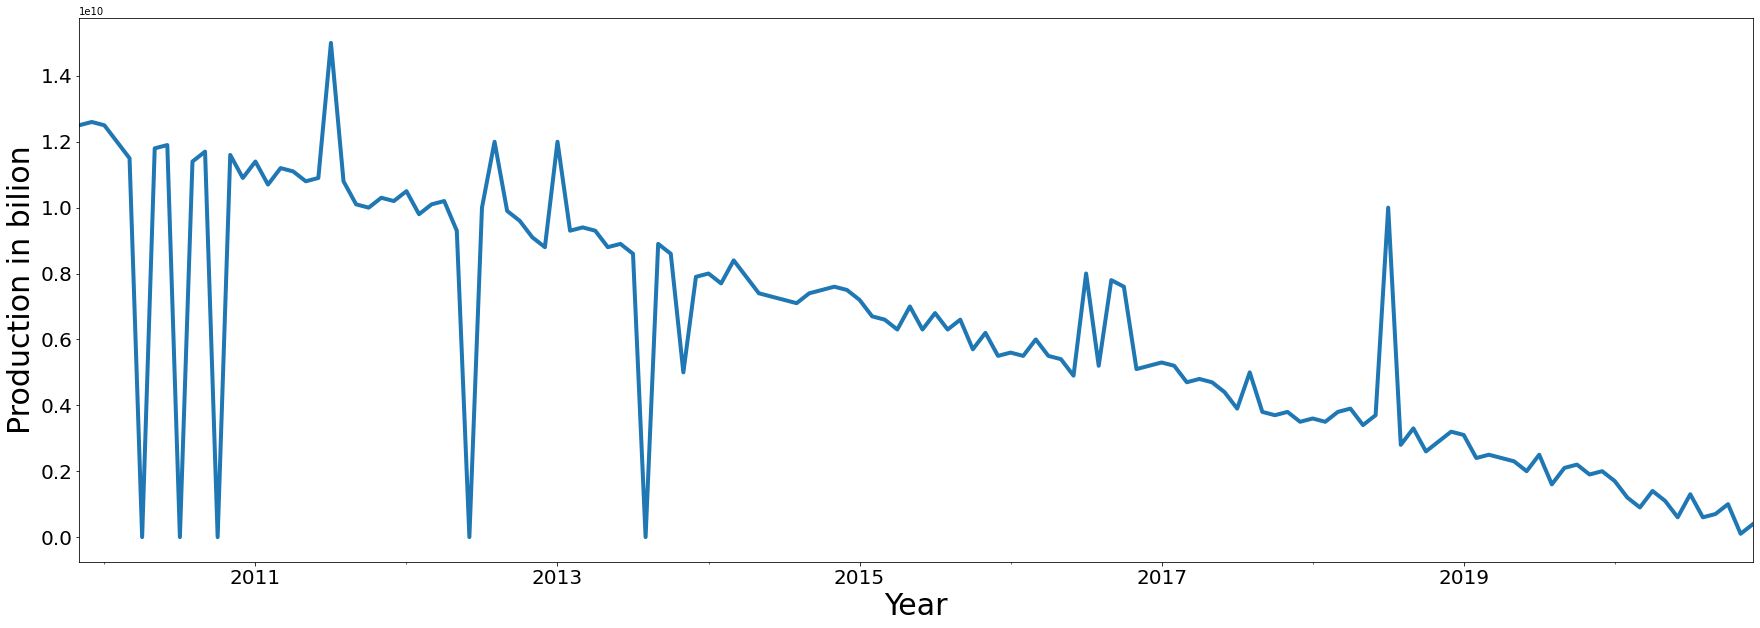

In [2]:
wall = pd.read_csv('well_ABC (1).csv',parse_dates=True,index_col='date')
plt.figure(figsize=(30 , 10))
wall.pd.plot(fontsize=20, linewidth=4.0)
plt.xlabel(u'Year', fontsize=30)
plt.ylabel(u'Production in bilion', fontsize=30)

ETS(Error/Trend/Seasonality) Model


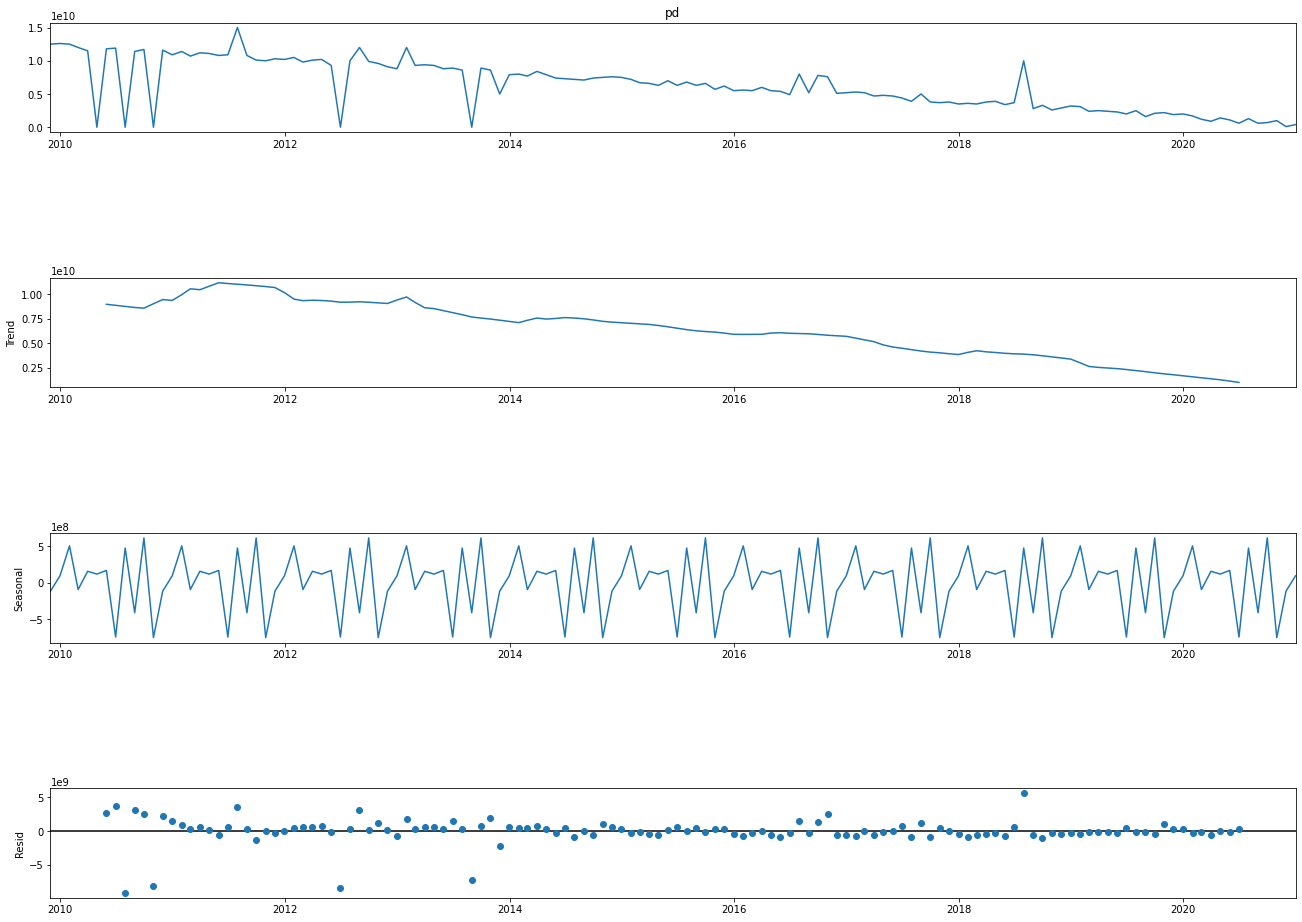

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(wall['pd'],model = 'add')
res = result_add.plot()
res.set_figheight(15)
res.set_figwidth(20)


SMA (Simple Moving Average Plots) 

<AxesSubplot:xlabel='date'>

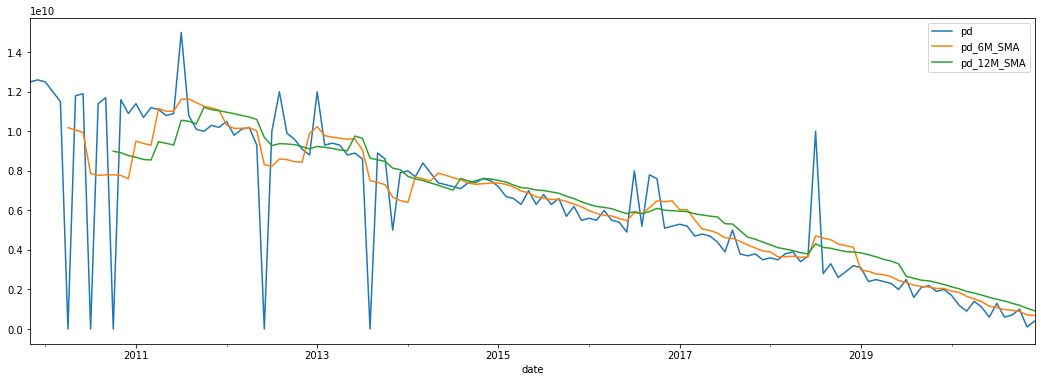

In [46]:
wall['pd_6M_SMA'] = wall['pd'].rolling(window=6).mean()
wall['pd_12M_SMA'] = wall['pd'].rolling(window=12).mean()
wall[['pd','pd_6M_SMA','pd_12M_SMA']].plot(figsize=(18,6))

EWMA(Exponential Weighted Moving Average) model is designed to address these issues on top of the SMA model.



Text(0.5, 1.0, 'EWMA Exponential Weighted Moving Average')

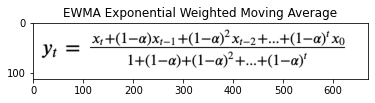

In [60]:
from matplotlib import image as mpimg
image = mpimg.imread("1_G62iNksb5ucvmIsYllg3AA.png")
plt.imshow(image)
plt.title("EWMA Exponential Weighted Moving Average")

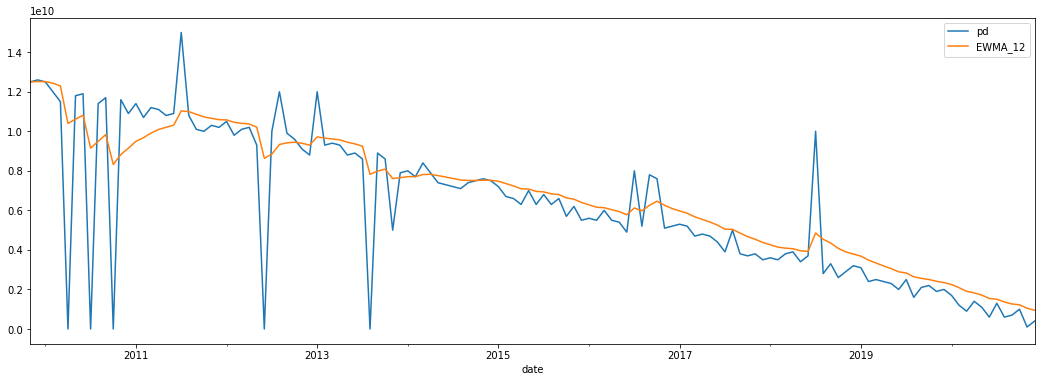

In [61]:
wall['EWMA_12'] = wall['pd'].ewm(span=12,adjust=False).mean()
wall[['pd','EWMA_12']].plot(figsize = (18,6));

Double Exponential Smoothing (Holt’s Method) 

Text(0.5, 1.0, 'Double Exponential Smoothing (Holt’s Method) ')

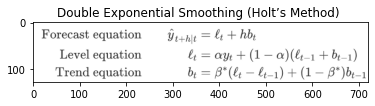

In [67]:
image = mpimg.imread("1_dsb_0bL0ZsCQkxj8vsU3pQ.png")
plt.imshow(image)
plt.title("Double Exponential Smoothing (Holt’s Method) ")

The Triple Exponential Smoothing method (Holt-Winters Method) add another smoothing factor, gamma,
on top of Holt’s Method.

Text(0.5, 1.0, 'Holt-Winters Method')

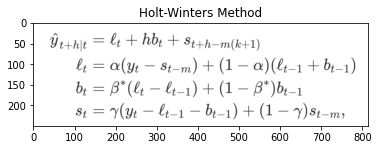

In [68]:
image = mpimg.imread("1_iqpk6fPW2mXPEQ70GLjtQQ.png")
plt.imshow(image)
plt.title("Holt-Winters Method")

Train & Test split:

In [46]:
train_ts = wall.iloc[:-10]
test_ts = wall.iloc[-10:]

In [47]:
print(train_ts.shape, test_ts.shape)


(124, 2) (10, 2)


In [48]:
import statsmodels
import statsmodels.api as sm

In [49]:
mod = sm.tsa.SARIMAX(train_ts['pd'], order=(1, 0, 0), trend=None)
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                     pd   No. Observations:                  124
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2893.290
Date:                Thu, 15 Dec 2022   AIC                           5790.579
Time:                        22:10:34   BIC                           5796.220
Sample:                    11-30-2009   HQIC                          5792.870
                         - 02-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9055      0.037     24.693      0.000       0.834       0.977
sigma2      1.052e+19   1.01e-21   1.04e+40      0.000    1.05e+19    1.05e+19
Ljung-Box (L1) (Q):                  26.81   Jarque-

c:\Users\FatmaAlRashdi\.conda\envs\tracking\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\FatmaAlRashdi\.conda\envs\tracking\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [50]:
print(res.forecast(steps=10))

2020-03-31    1.086600e+09
2020-04-30    9.839169e+08
2020-05-31    8.909370e+08
2020-06-30    8.067437e+08
2020-07-31    7.305066e+08
2020-08-31    6.614740e+08
2020-09-30    5.989648e+08
2020-10-31    5.423628e+08
2020-11-30    4.911097e+08
2020-12-31    4.446999e+08
Freq: M, Name: predicted_mean, dtype: float64


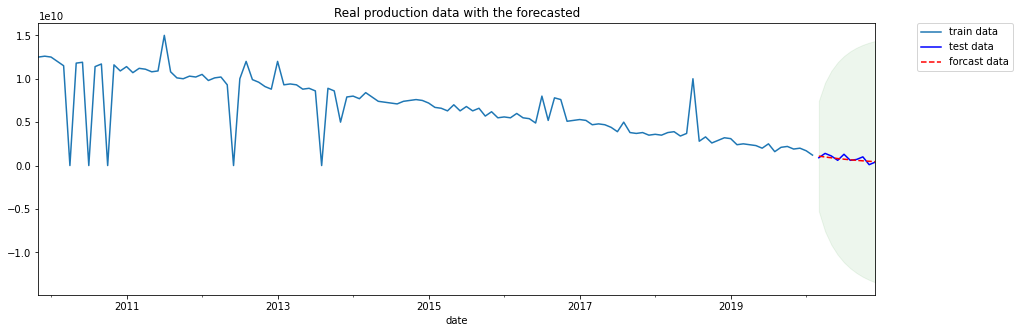

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train_ts['pd'].plot(ax=ax, label='train data')
test_ts['pd'].plot(ax=ax, c='b',  label="test data")
plt.title('Real production data with the forecasted') # subplot 211 title

# Construct the forecasts
fcast = res.get_forecast(steps=10).summary_frame()
fcast['mean'].plot(ax=ax, style='r--', label="forcast data")
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='g', alpha=0.07);
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
